In [1]:
!pip install rasterio

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# SELECCION DE VARIABLES

## Pendiente:

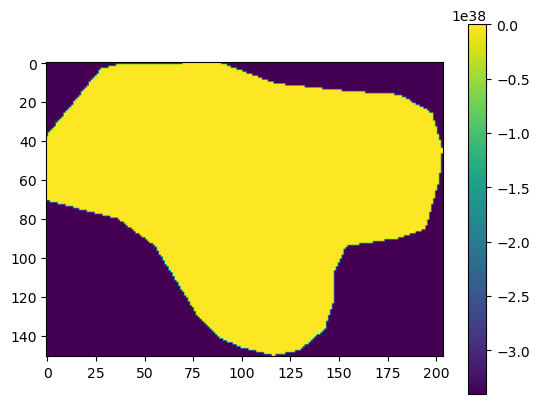

In [3]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/PEND1.tif?raw=true')
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

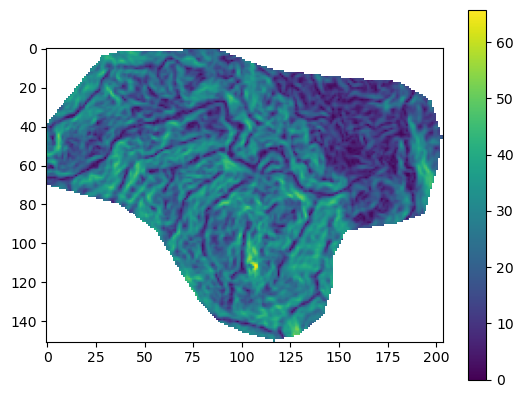

In [4]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [5]:
type(pendiente)

numpy.ndarray

In [6]:
np.shape(pendiente)

(151, 204)

In [7]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(19705,)

## Aspecto:

(19705,)

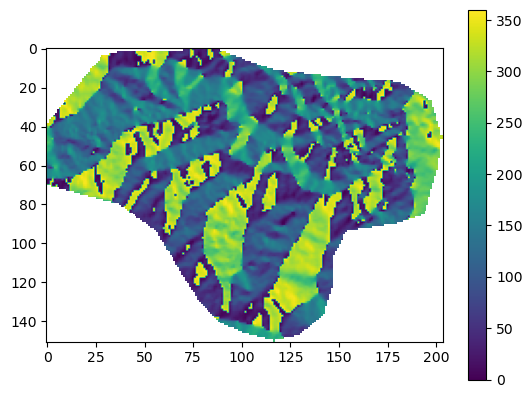

In [8]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

In [9]:
np.shape(aspecto)

(151, 204)

## Acumulacion de flujo: 

(19705,)

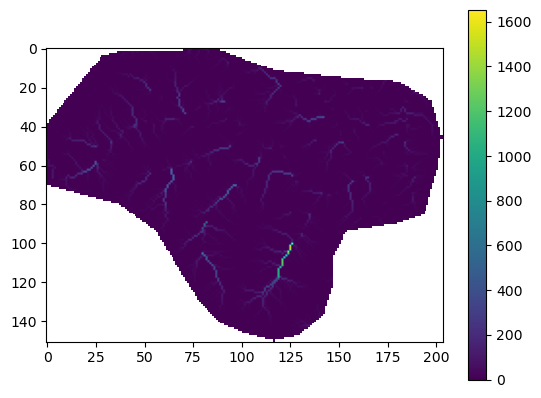

In [80]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/FlowAcc_final1.tif?raw=true')
flow_acc=raster.read(1)
flow_acc=np.where(flow_acc<-100,np.nan,flow_acc)
flow_acc_vector=flow_acc.ravel()
flow_acc_vector_MenM=flow_acc_vector[~np.isnan(flow_acc_vector)]
plt.imshow(flow_acc)
plt.colorbar()
flow_acc_vector_MenM.shape



## Curvatura:

(10037,)

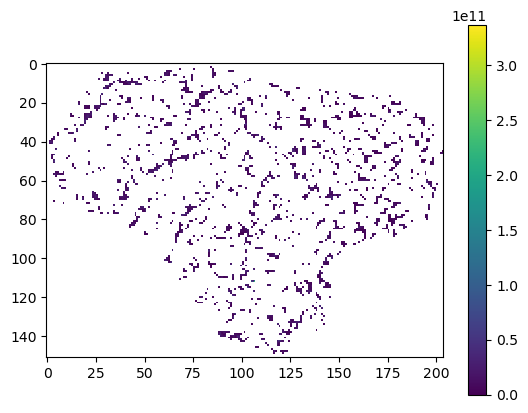

In [98]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/CURV_21.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-500,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura_vector_MenM.shape

# Cobertura:

(19705,)

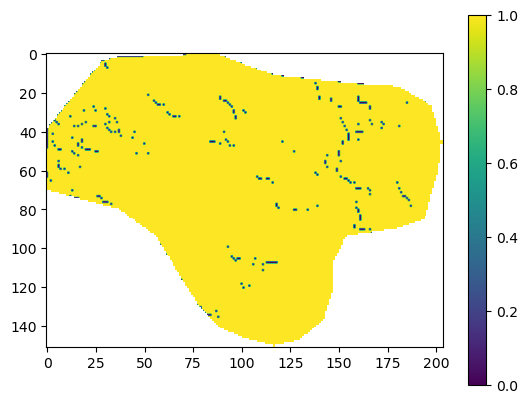

In [11]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Cobert_final1.tif?raw=true')
cobertura=raster.read(1)
cobertura=np.where(cobertura>=3,np.nan,cobertura)
cobertura_vector=cobertura.ravel()
cobertura_vector_MenM=cobertura_vector[~np.isnan(cobertura_vector)]
plt.imshow(cobertura)
plt.colorbar()
cobertura_vector_MenM.shape

# Geologia

(19705,)

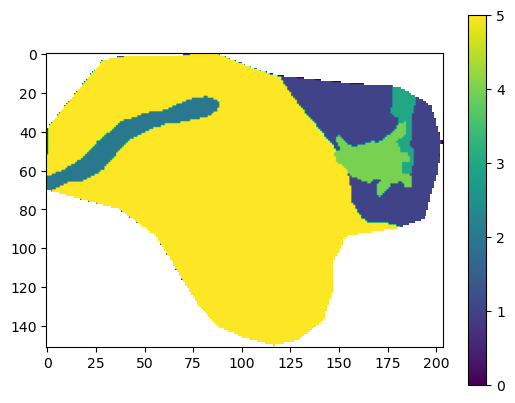

In [94]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Geolo_final1.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia>=10,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

In [13]:
np.unique(geologia)

array([ 0.,  1.,  2.,  3.,  4.,  5., 15.])

# Elevacion:


(19705,)

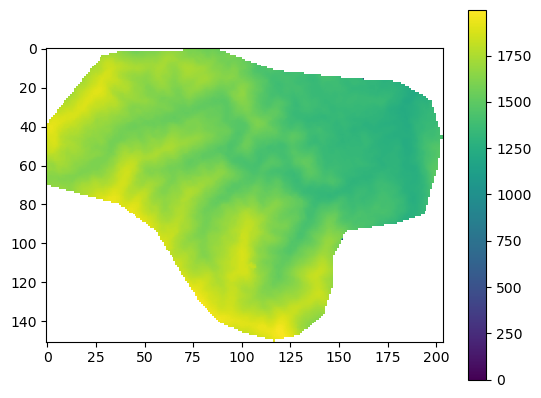

In [14]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/elev_final1.tif?raw=true')
elevacion=raster.read(1)
elevacion=np.where(elevacion<0,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

# Inventario:

(19705,)

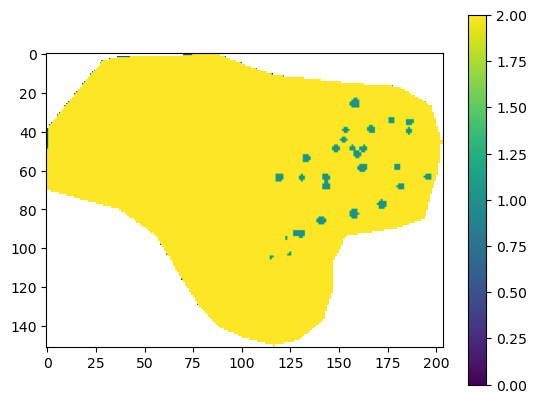

In [15]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
inventario=np.where(inventario>=3,np.nan,inventario)
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

# DataFrame

(19705,)

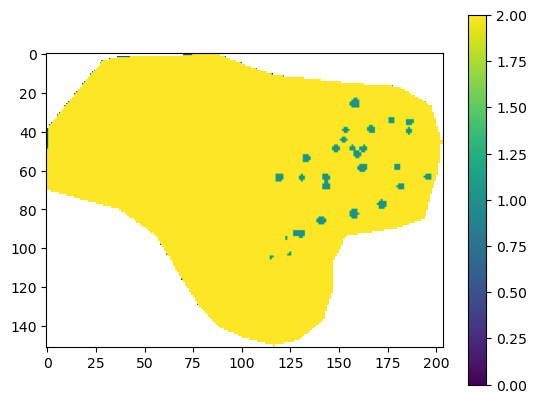

In [16]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/MenM1.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk * inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [95]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'aspecto':aspecto_vector_MenM, 'elevacion': elevacion_vector_MenM, 'cobertura':cobertura_vector_MenM, 'geologia':geologia_vector_MenM, 'flow_acc':flow_acc_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'aspecto', 'elevacion', 'cobertura', 'geologia', 'flow_acc']


In [96]:
df.head()

,inventario,pendiente,aspecto,elevacion,cobertura,geologia,flow_acc
0,0.0,20.832821,38.945808,1621.0,0.0,0.0,20.0
1,0.0,21.867115,45.000000,1614.0,0.0,0.0,24.0
2,0.0,20.780851,49.332314,1603.0,1.0,0.0,27.0
3,0.0,16.425795,31.504267,1596.0,1.0,0.0,80.0
4,0.0,15.849223,358.363434,1595.0,1.0,5.0,93.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19705 entries, 0 to 19704
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  19705 non-null  float64
 1   pendiente   19705 non-null  float32
 2   aspecto     19705 non-null  float32
 3   elevacion   19705 non-null  float64
 4   cobertura   19705 non-null  float64
 5   geologia    19705 non-null  float64
 6   flow_acc    19705 non-null  float32
dtypes: float32(3), float64(4)
memory usage: 846.8 KB


In [100]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1907 to 16849
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  312 non-null    float64
 1   pendiente   312 non-null    float32
 2   aspecto     312 non-null    float32
 3   elevacion   312 non-null    float64
 4   cobertura   312 non-null    float64
 5   geologia    312 non-null    float64
 6   flow_acc    312 non-null    float32
dtypes: float32(3), float64(4)
memory usage: 15.8 KB


In [101]:
resumen=df1.describe().T
print(resumen)

            count         mean         std          min          25%  \
inventario  312.0     0.993590    0.079935     0.000000     1.000000   
pendiente   312.0    17.315426   11.078757     0.464550     8.020389   
aspecto     312.0   173.995926  113.095970     1.218874    67.631006   
elevacion   312.0  1372.788462   78.922854  1228.000000  1321.750000   
cobertura   312.0     0.980769    0.137556     0.000000     1.000000   
geologia    312.0     3.368590    1.761149     0.000000     1.000000   
flow_acc    312.0    22.679487  129.917465     0.000000     0.000000   

                    50%          75%          max  
inventario     1.000000     1.000000     1.000000  
pendiente     15.478577    26.532661    47.808998  
aspecto      160.670097   286.538460   359.635071  
elevacion   1361.500000  1419.000000  1906.000000  
cobertura      1.000000     1.000000     1.000000  
geologia       4.000000     5.000000     5.000000  
flow_acc       1.000000     6.000000  1552.000000  


In [103]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,aspecto,elevacion,cobertura,geologia,flow_acc
0,20.832821,38.945808,1621.0,0.0,0.0,20.0
1,21.867115,45.000000,1614.0,0.0,0.0,24.0
2,20.780851,49.332314,1603.0,1.0,0.0,27.0
3,16.425795,31.504267,1596.0,1.0,0.0,80.0
4,15.849223,358.363434,1595.0,1.0,5.0,93.0


# Analisis univariado

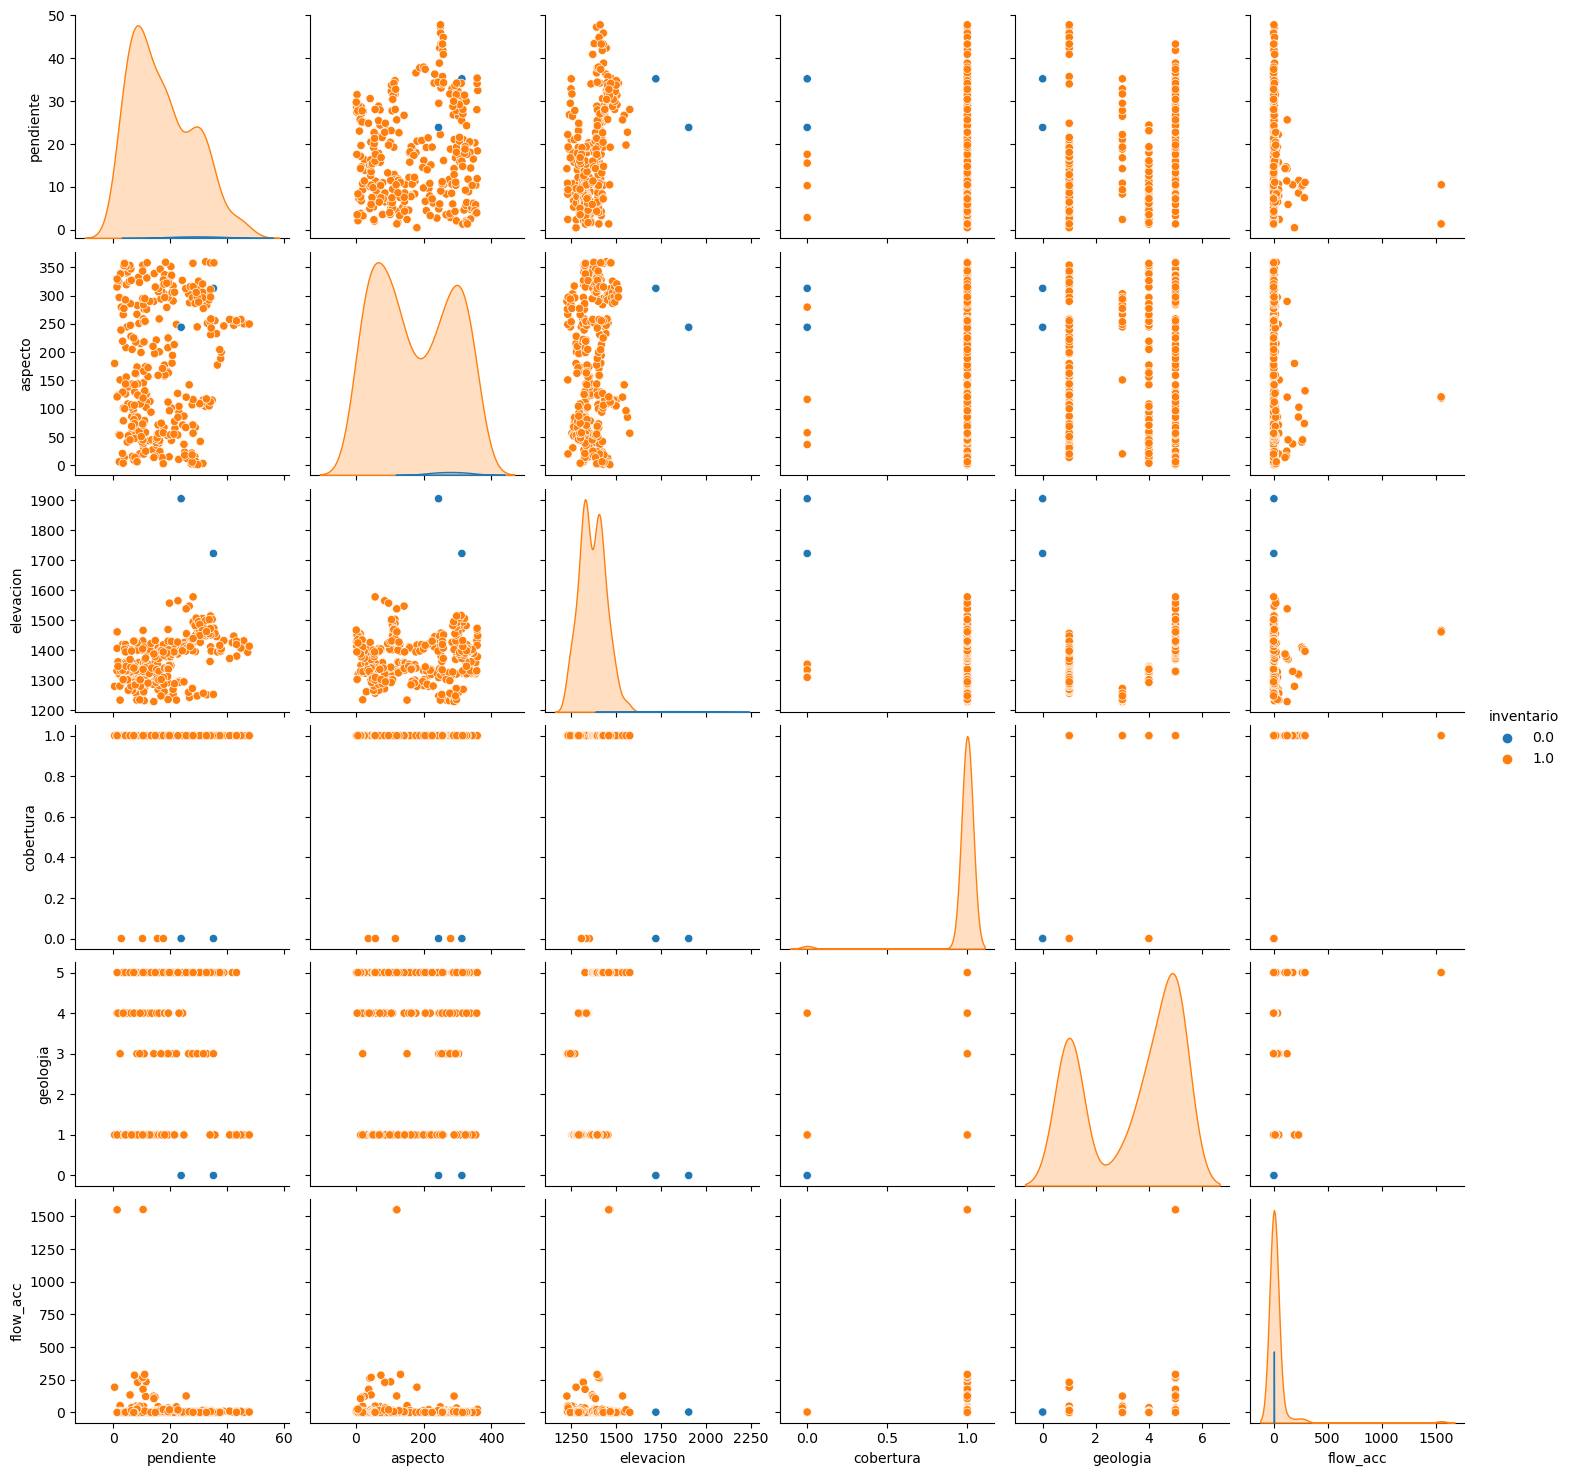

In [104]:
sns.pairplot(df1, hue='inventario');

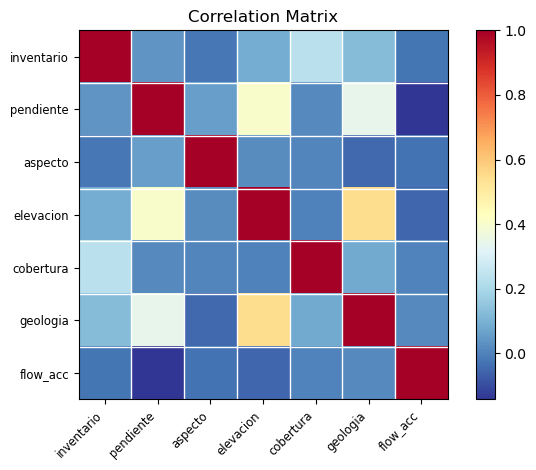

In [105]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

Text(0, 0.5, 'Frecuencia')

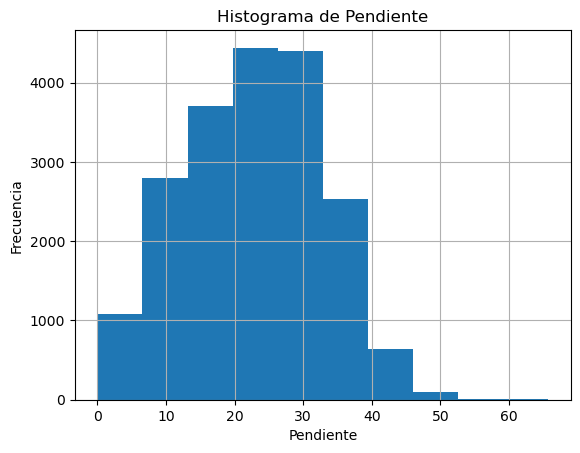

In [106]:
df.pendiente.hist()
plt.title('Histograma de Pendiente')
plt.xlabel('Pendiente')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

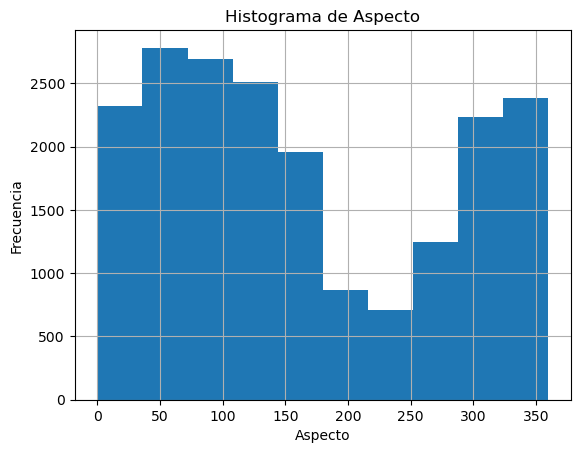

In [107]:
df.aspecto.hist()
plt.title('Histograma de Aspecto')
plt.xlabel('Aspecto')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

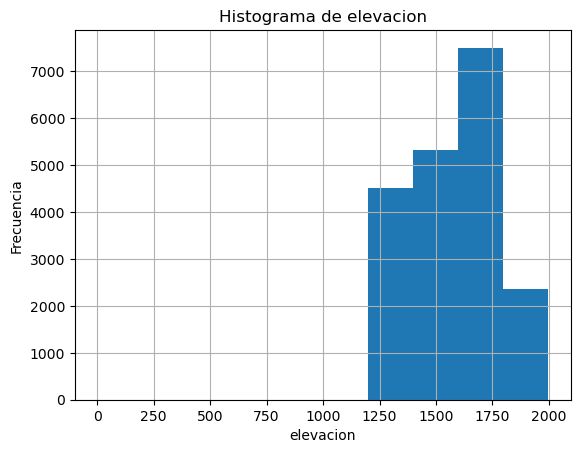

In [27]:
df.elevacion.hist()
plt.title('Histograma de elevacion')
plt.xlabel('elevacion')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

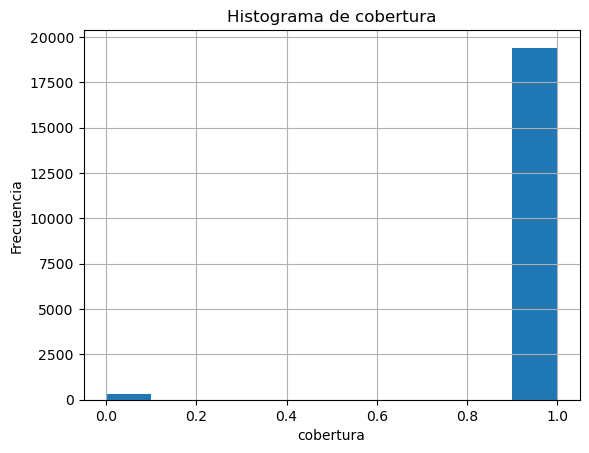

In [28]:
df.cobertura.hist()
plt.title('Histograma de cobertura')
plt.xlabel('cobertura')
plt.ylabel('Frecuencia')

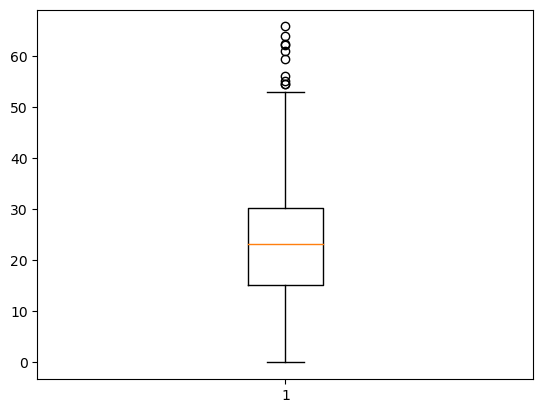

In [29]:
plt.boxplot(df['pendiente']);

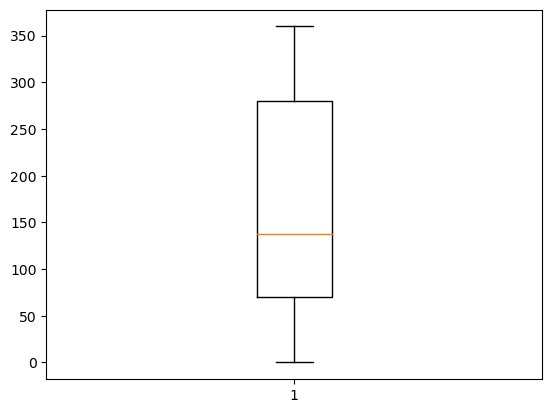

In [30]:
plt.boxplot(df['aspecto']);

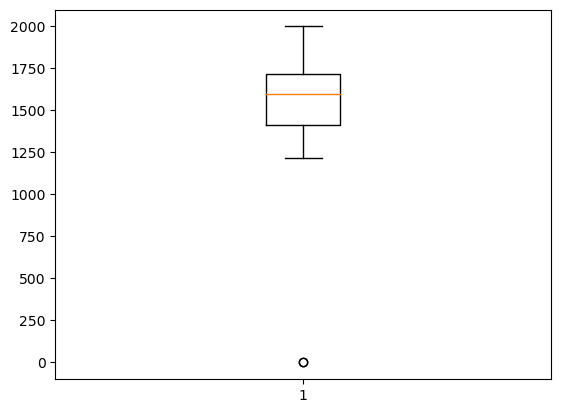

In [31]:
plt.boxplot(df['elevacion']);

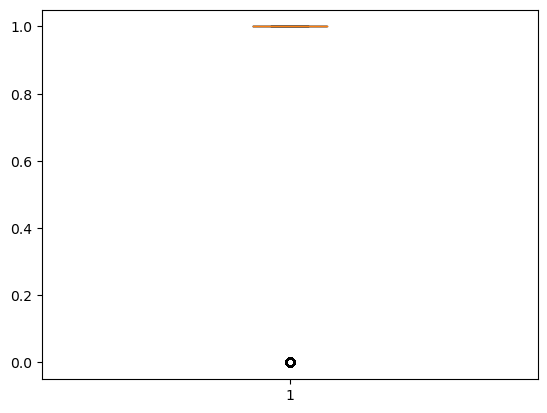

In [32]:
plt.boxplot(df['cobertura']);

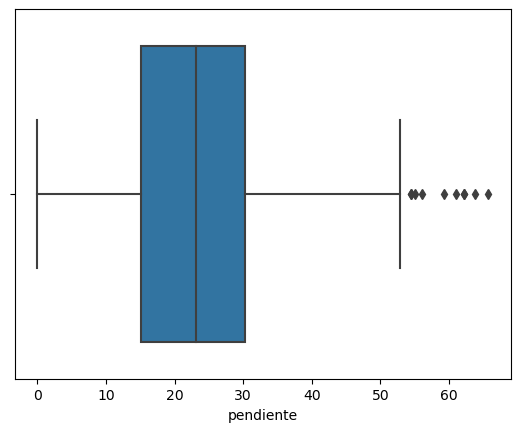

In [33]:
sns.boxplot(x='pendiente', data=df);

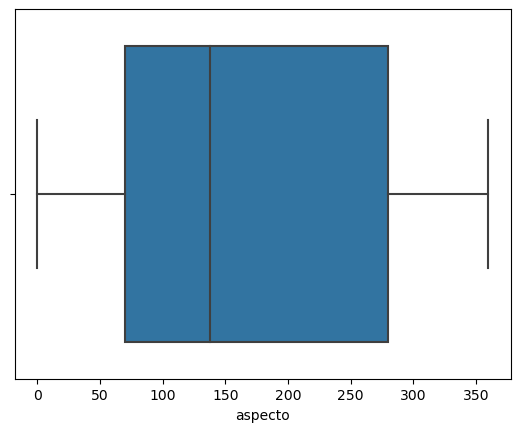

In [34]:
sns.boxplot(x='aspecto', data=df);

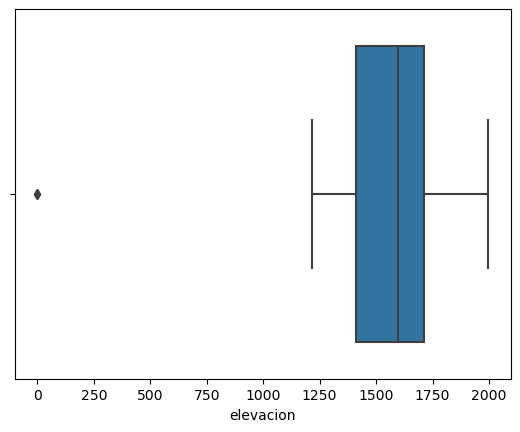

In [35]:
sns.boxplot(x='elevacion', data=df);

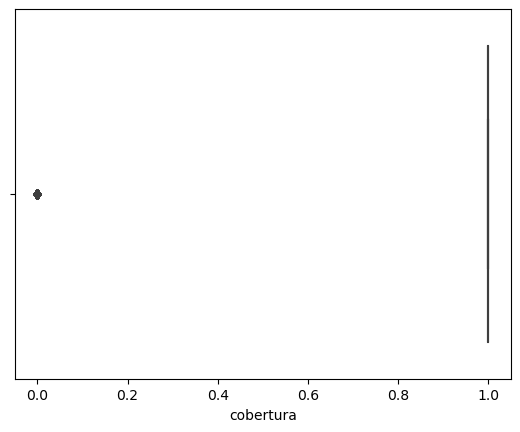

In [36]:
sns.boxplot(x='cobertura', data=df);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


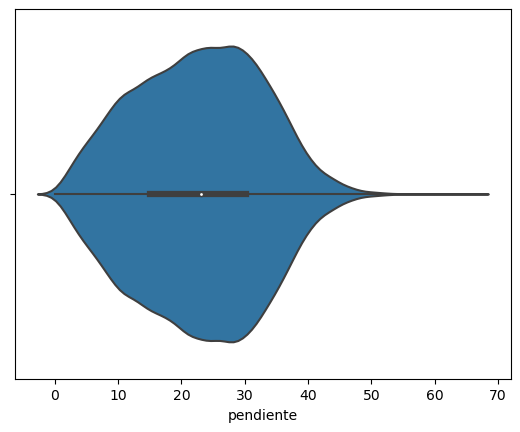

In [37]:
sns.violinplot(df['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


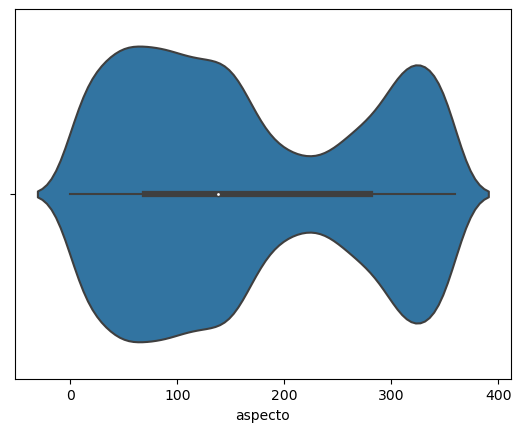

In [38]:
sns.violinplot(df['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


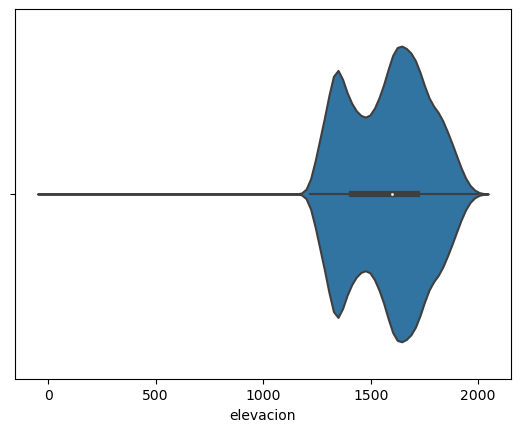

In [39]:
sns.violinplot(df['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


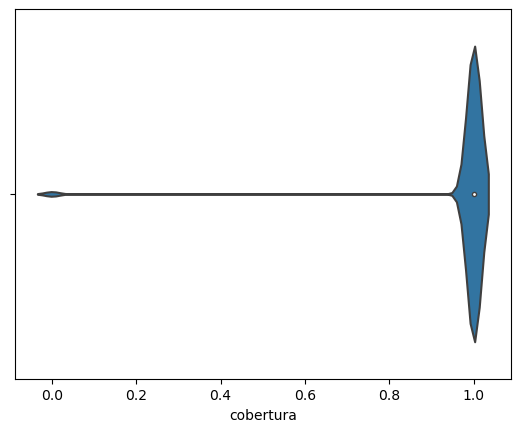

In [40]:
sns.violinplot(df['cobertura']);

# Analisis multivariado

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


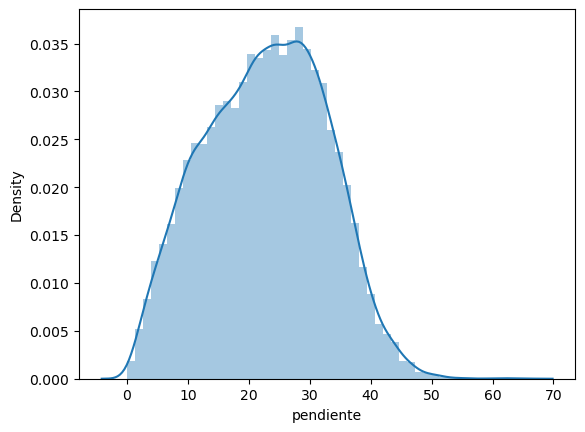

In [41]:
sns.distplot(df['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


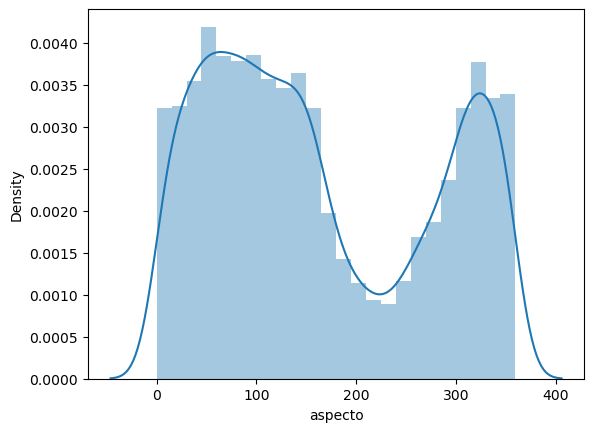

In [42]:
sns.distplot(df['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


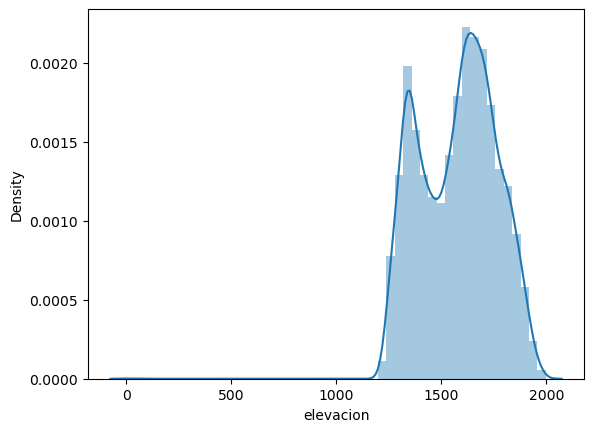

In [43]:
sns.distplot(df['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


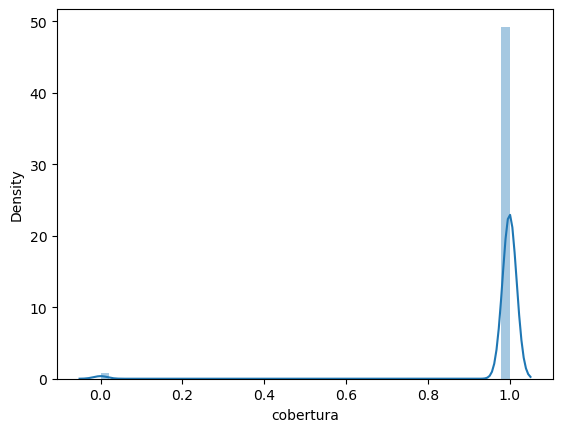

In [44]:
sns.distplot(df['cobertura']);

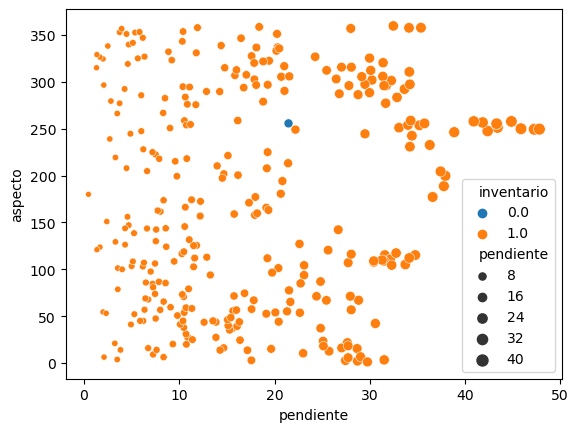

In [45]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

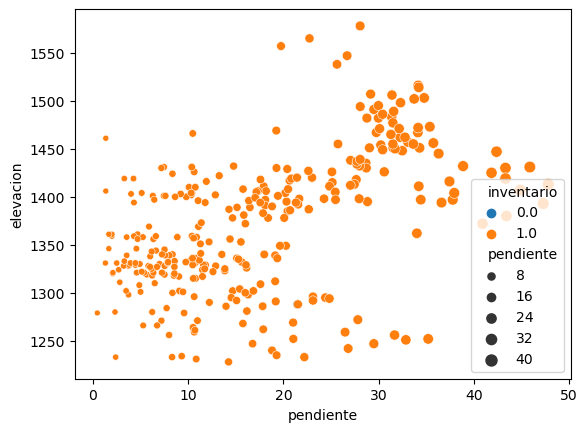

In [46]:
sns.scatterplot(x="pendiente", y="elevacion", hue="inventario", size='pendiente',data=df1);

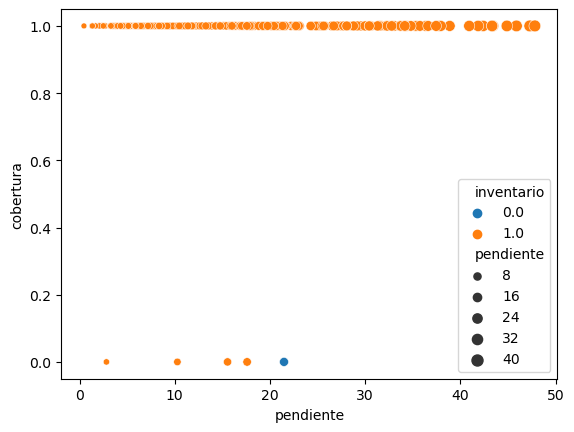

In [47]:
sns.scatterplot(x="pendiente", y="cobertura", hue="inventario", size='pendiente',data=df1);

In [108]:
media=df.groupby('inventario').mean()
print(media)

            pendiente     aspecto    elevacion  cobertura  geologia   flow_acc
inventario                                                                    
0.0         28.266462  200.876709  1715.156863   0.078431  0.666667  18.196079
1.0         17.236561  173.323044  1369.938710   0.987097  3.390323  22.809677
2.0         22.832577  164.139877  1579.279415   0.986869  4.227306  11.373966


In [109]:
#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

2.0    19344
1.0      310
0.0       51
Name: inventario, dtype: int64

In [110]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [111]:
si_lands.count()

inventario    19654
pendiente     19654
aspecto       19654
elevacion     19654
cobertura     19654
geologia      19654
flow_acc      19654
dtype: int64

In [112]:
no_lands.count()

inventario    51
pendiente     51
aspecto       51
elevacion     51
cobertura     51
geologia      51
flow_acc      51
dtype: int64

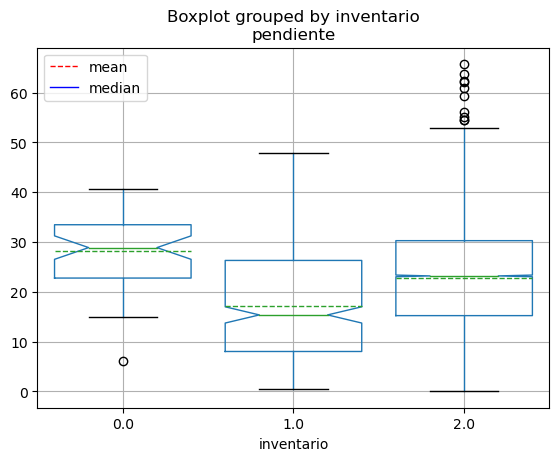

In [113]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

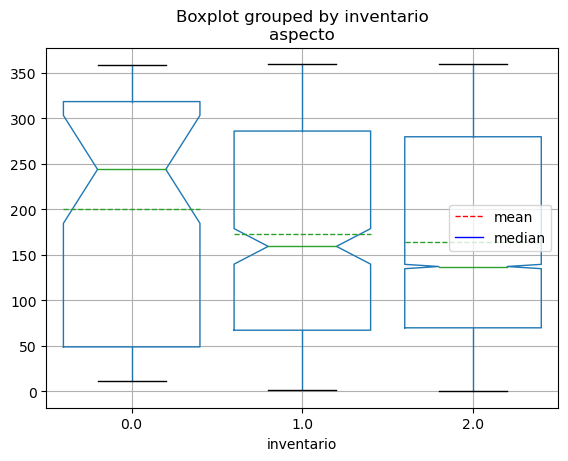

In [54]:
df.boxplot('aspecto', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

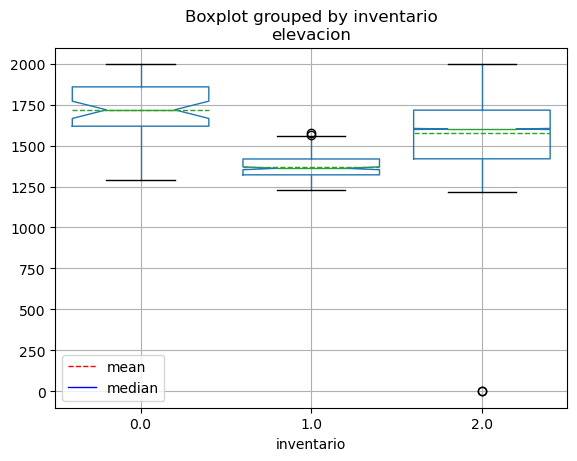

In [114]:
df.boxplot('elevacion', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

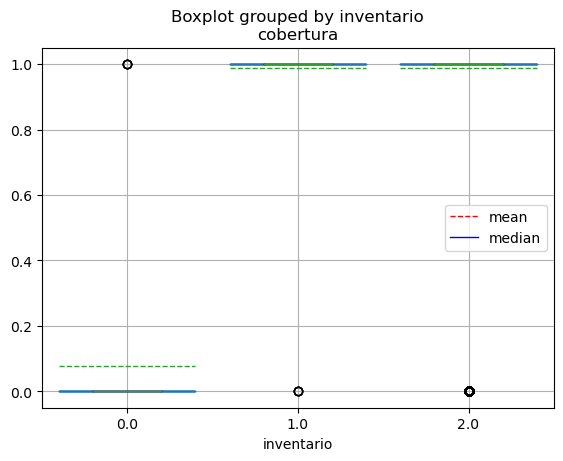

In [115]:
df.boxplot('cobertura', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

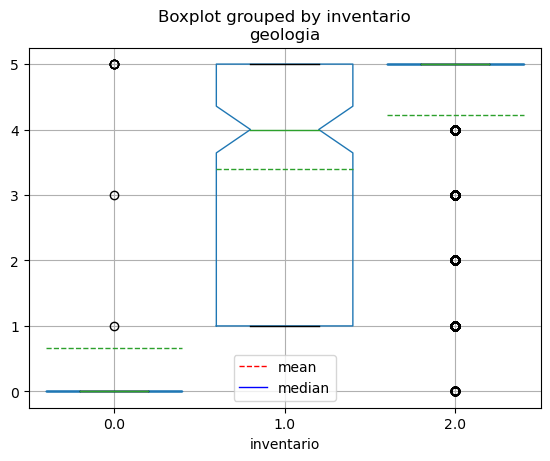

In [116]:
df.boxplot('geologia', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

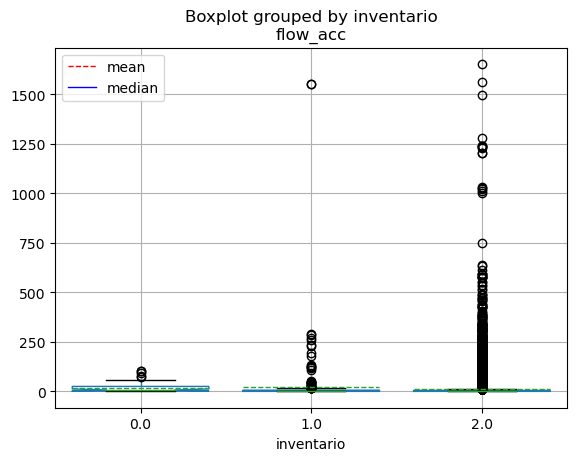

In [117]:
df.boxplot('flow_acc', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [118]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=3.9561099663786594, pvalue=7.644682534352887e-05)

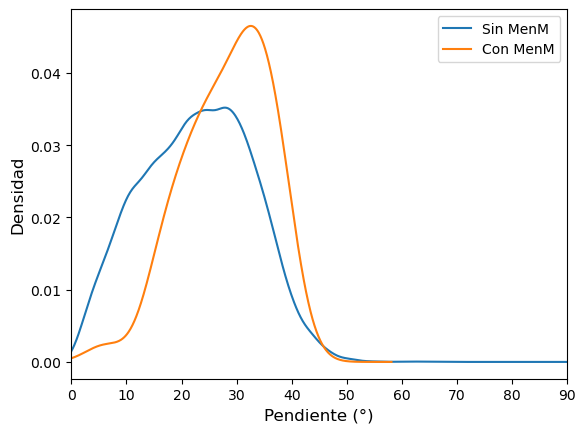

In [119]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

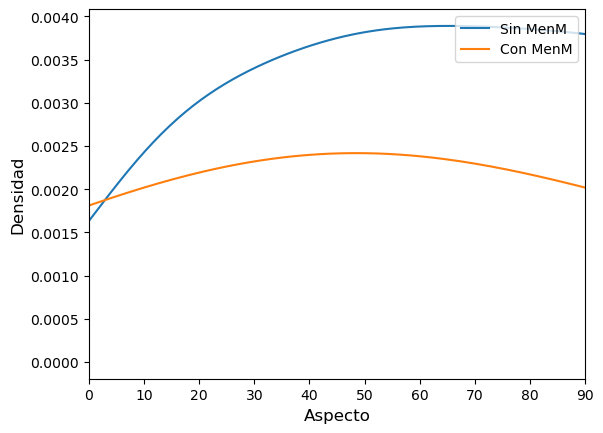

In [120]:
fig, ax = plt.subplots()
si_lands['aspecto'].plot.kde(ax=ax, label='Sin MenM')
no_lands['aspecto'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Aspecto', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

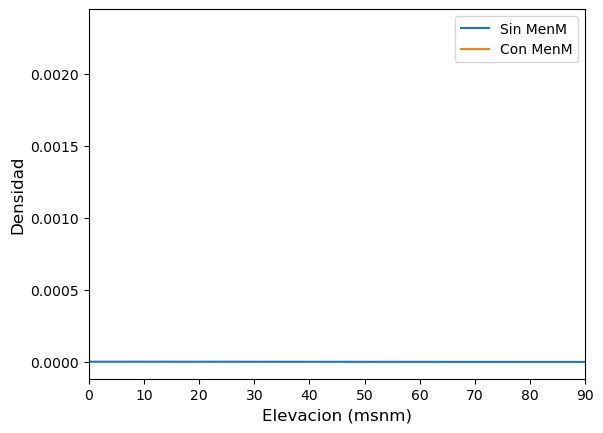

In [122]:
fig, ax = plt.subplots()
si_lands['elevacion'].plot.kde(ax=ax, label='Sin MenM')
no_lands['elevacion'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Elevacion (msnm)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

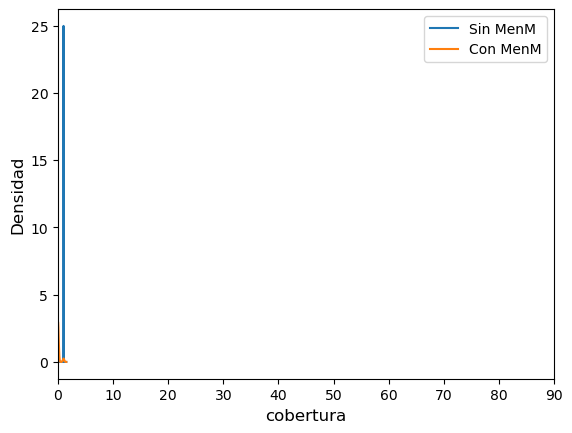

In [123]:
fig, ax = plt.subplots()
si_lands['cobertura'].plot.kde(ax=ax, label='Sin MenM')
no_lands['cobertura'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('cobertura', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

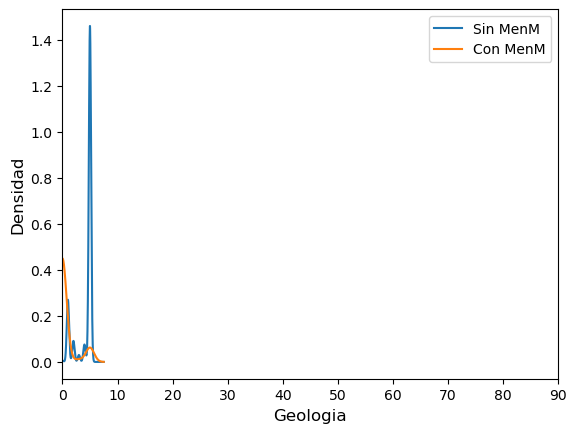

In [124]:
fig, ax = plt.subplots()
si_lands['geologia'].plot.kde(ax=ax, label='Sin MenM')
no_lands['geologia'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Geologia', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

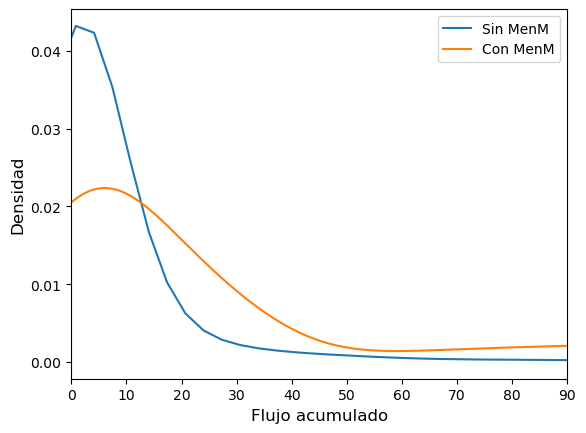

In [125]:
fig, ax = plt.subplots()
si_lands['flow_acc'].plot.kde(ax=ax, label='Sin MenM')
no_lands['flow_acc'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Flujo acumulado', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


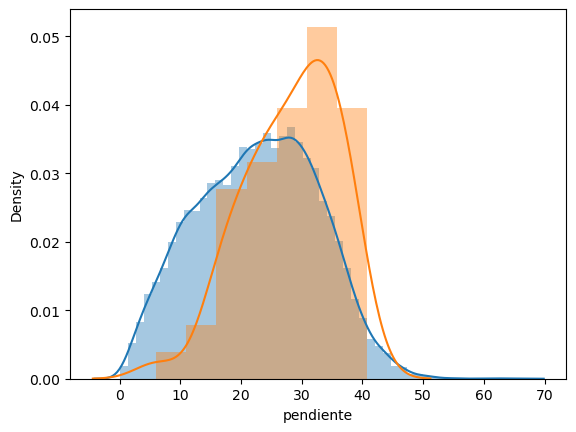

In [126]:
sns.distplot(si_lands['pendiente'])
sns.distplot(no_lands['pendiente']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


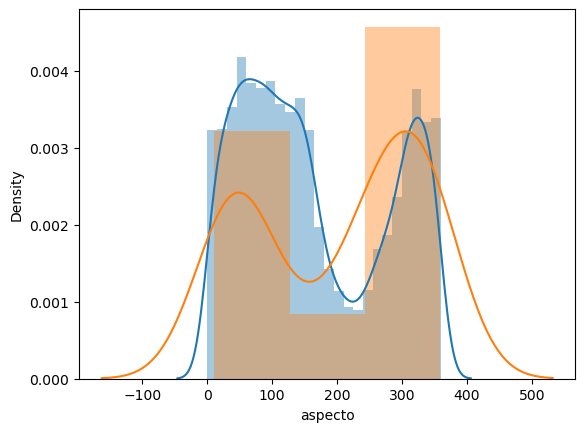

In [63]:
sns.distplot(si_lands['aspecto'])
sns.distplot(no_lands['aspecto']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


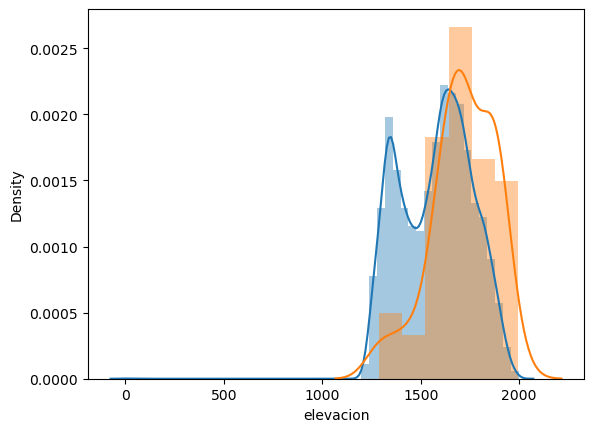

In [64]:
sns.distplot(si_lands['elevacion'])
sns.distplot(no_lands['elevacion']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


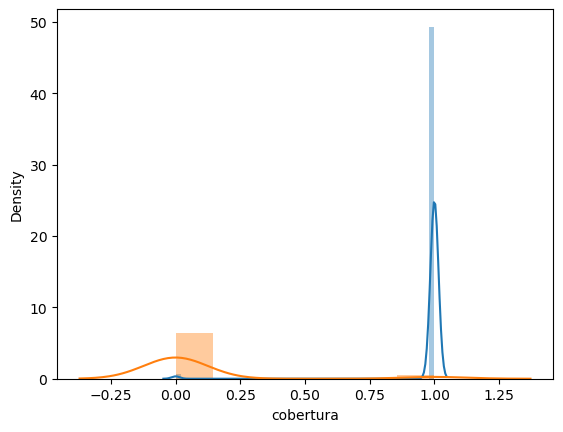

In [65]:
sns.distplot(si_lands['cobertura'])
sns.distplot(no_lands['cobertura']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


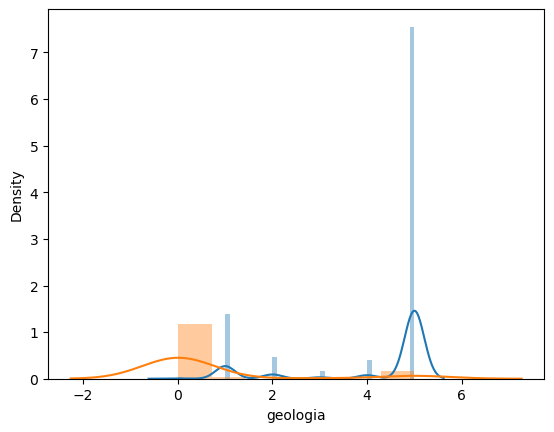

In [127]:
sns.distplot(si_lands['geologia'])
sns.distplot(no_lands['geologia']);

C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juan Esteban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


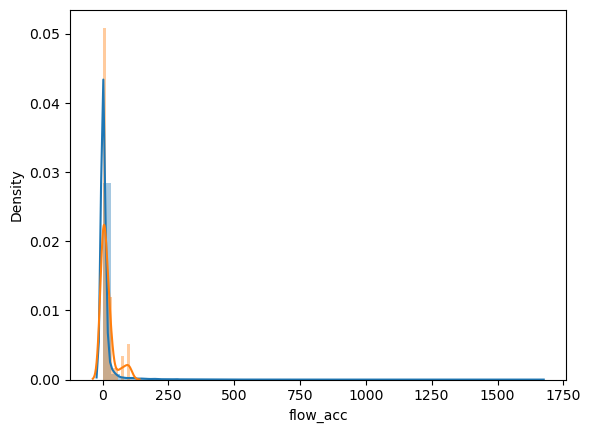

In [128]:
sns.distplot(si_lands['flow_acc'])
sns.distplot(no_lands['flow_acc']);

In [129]:

#Para contar el numero de celdas con y sin MenM
df['inventario'].value_counts()

2.0    19344
1.0      310
0.0       51
Name: inventario, dtype: int64

#### Numero de celdas con MenM = 310

# Analisis de componentes principales

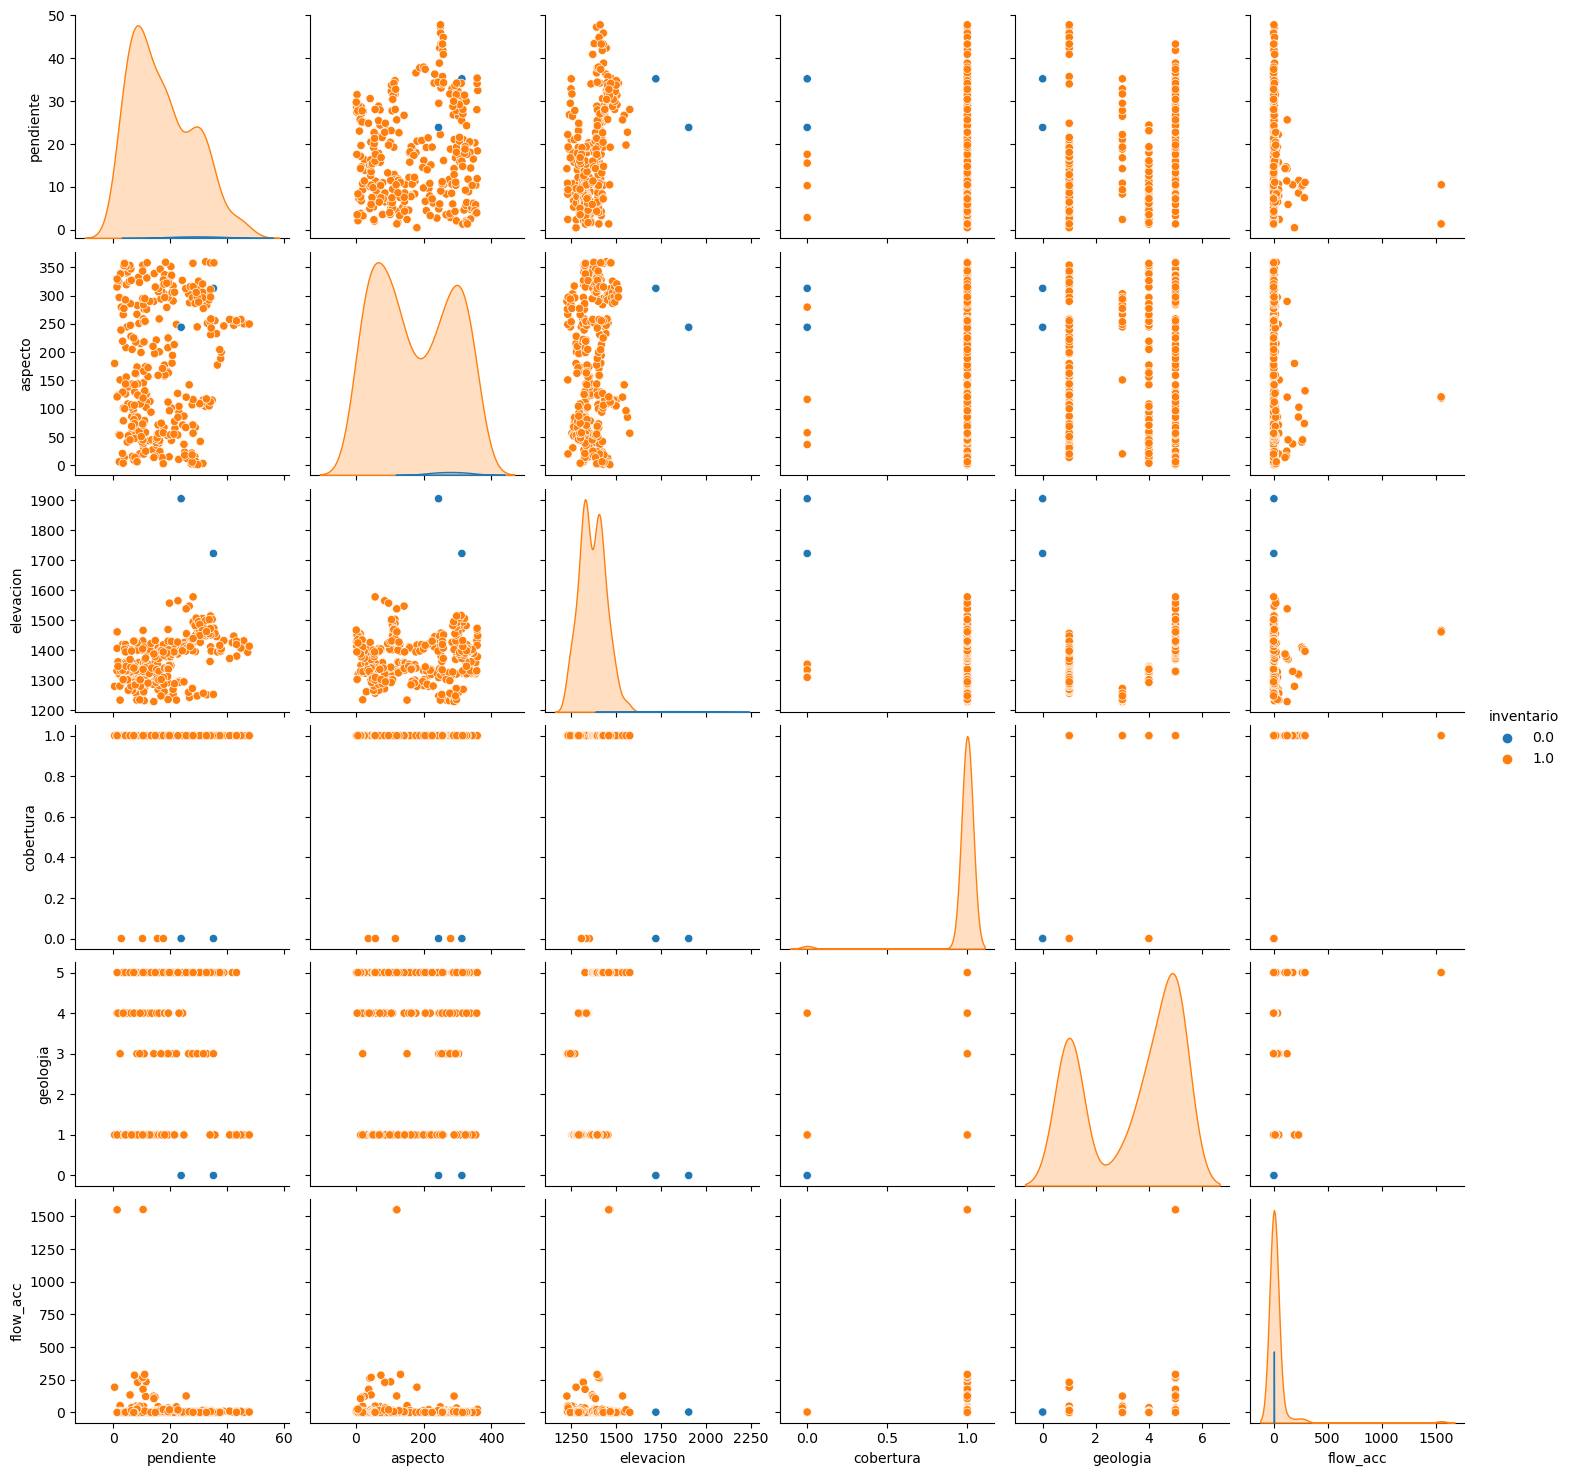

In [130]:
sns.pairplot(df1, hue='inventario')

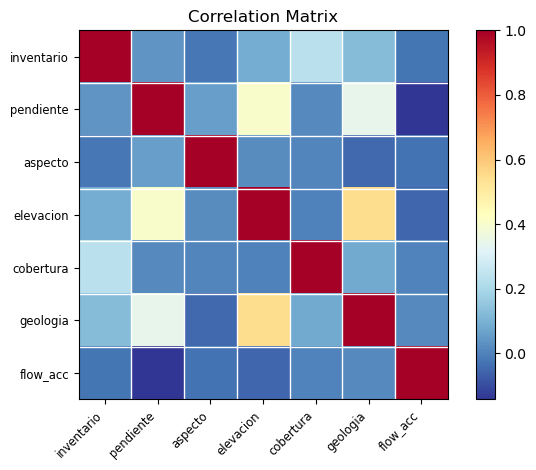

In [131]:
MC=DataFrame(df.corr())
smg.plot_corr(MC, xnames=list(MC.columns)) ;

In [132]:
Mean=df.groupby('inventario').mean()
print(Mean)

            pendiente     aspecto    elevacion  cobertura  geologia   flow_acc
inventario                                                                    
0.0         28.266462  200.876709  1715.156863   0.078431  0.666667  18.196079
1.0         17.236561  173.323044  1369.938710   0.987097  3.390323  22.809677
2.0         22.832577  164.139877  1579.279415   0.986869  4.227306  11.373966


In [133]:
from scipy import stats
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]
si_lands.count()
no_lands.count()
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=3.9561099663786594, pvalue=7.644682534352887e-05)

In [134]:
from scipy import stats
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]
si_lands.count()
no_lands.count()
stats.ttest_ind(no_lands["aspecto"], si_lands["aspecto"])

Ttest_indResult(statistic=2.345620283628113, pvalue=0.019005310103998065)

In [135]:
puntos=df['inventario']
H=df.drop(['inventario'], axis=1) 
H.head()
#data= pd.read_excel("https://github.com/edieraristizabal/Libro_cartoGeotecnia/blob/master/data/PUNTOS.xlsx?raw=true", sheet_name='PUNTOS')
#puntos=data['INVENTARIO']
#data.drop('INVENTARIO', axis=1, inplace=True)

,pendiente,aspecto,elevacion,cobertura,geologia,flow_acc
0,20.832821,38.945808,1621.0,0.0,0.0,20.0
1,21.867115,45.000000,1614.0,0.0,0.0,24.0
2,20.780851,49.332314,1603.0,1.0,0.0,27.0
3,16.425795,31.504267,1596.0,1.0,0.0,80.0
4,15.849223,358.363434,1595.0,1.0,5.0,93.0


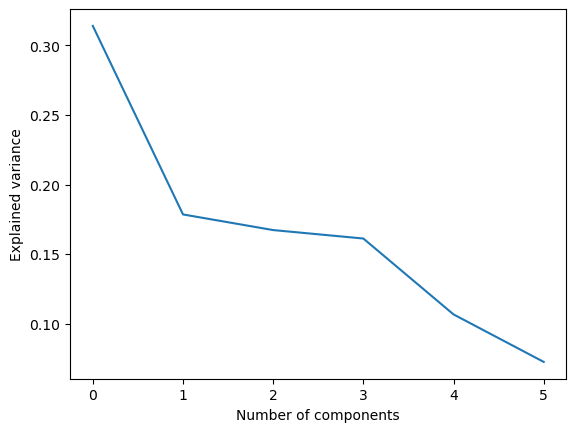

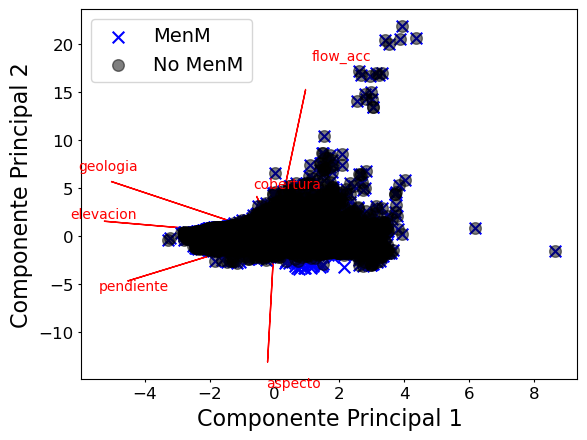

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

H = pd.DataFrame(scale(H), columns=['pendiente', 'aspecto', 'elevacion', 'cobertura', 'geologia','flow_acc'])

n = len(H.columns)
pca = PCA(n_components=n)
pca = pca.fit(H)
pca_samples = pca.transform(H)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(H)[:,0] # Componente principal 1
ys = pca.transform(H)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys ) 

for i in range(len(xvector)):
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(H.columns.values)[i], color='r') 

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)
plt.show()



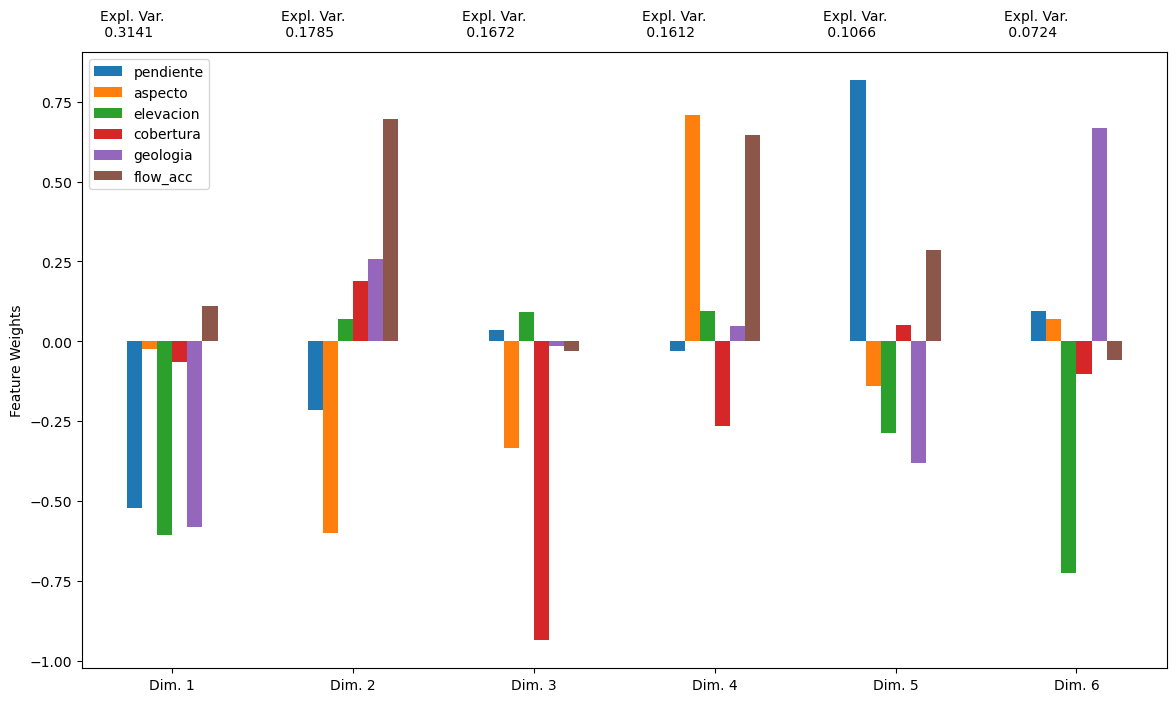

In [139]:
def pca_results(data, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(H, pca)